# 🏅 Olympics Data Analysis Project

### Objective:
- Perform Exploratory Data Analysis (EDA) on Olympic dataset
- Analyze medal trends, countries, athletes, gender participation
- Build a Machine Learning model to predict medal counts

Dataset: 120 Years of Olympic History (Kaggle)

#### Name : Prathmesh Nitnaware                              

##### Roll no.: 23102B0060


In [3]:
# ==================== Imports ====================
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning (optional)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Display plots inline (for Jupyter)
%matplotlib inline

In [4]:
# Load CSV data
df = pd.read_csv("./athlete_events.csv")
df_region = pd.read_csv("./noc_regions.csv")

# Show shape
print("Athlete Data:", df.shape)
print("Region Data:", df_region.shape)

# Merge region data for country information
df = pd.merge(df, df_region, on="NOC", how="left")

df.head()

Athlete Data: (271116, 15)
Region Data: (230, 3)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [14]:
# Check data info
df.info()

# Summary stats
df.describe()

# Check missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [5]:
# Fill/clean Age, Height, Weight if needed (example)
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Height"].fillna(df["Height"].median(), inplace=True)
df["Weight"].fillna(df["Weight"].median(), inplace=True)

In [6]:
# Convert Medal to categorical
df["Medal"].fillna("No Medal", inplace=True)

# Simplify medal output for counting
df["MedalWon"] = np.where(df["Medal"]!="No Medal", 1, 0)

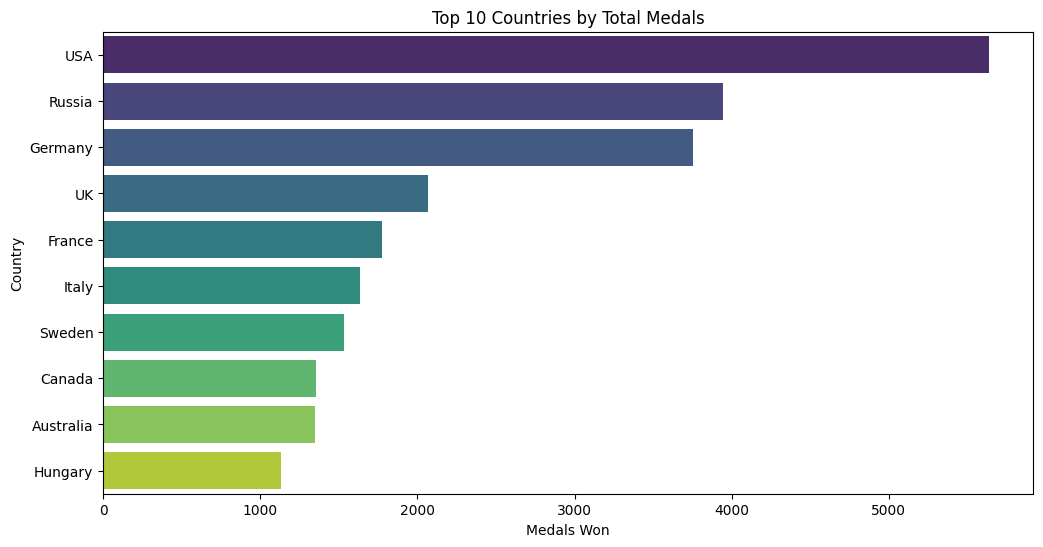

In [7]:
# Total medals by country
medal_tally = df[df["Medal"]!="No Medal"].groupby("region")["Medal"].count().reset_index()
medal_tally = medal_tally.sort_values(by="Medal", ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x="Medal", y="region", data=medal_tally, palette="viridis")
plt.title("Top 10 Countries by Total Medals")
plt.xlabel("Medals Won")
plt.ylabel("Country")
plt.show()

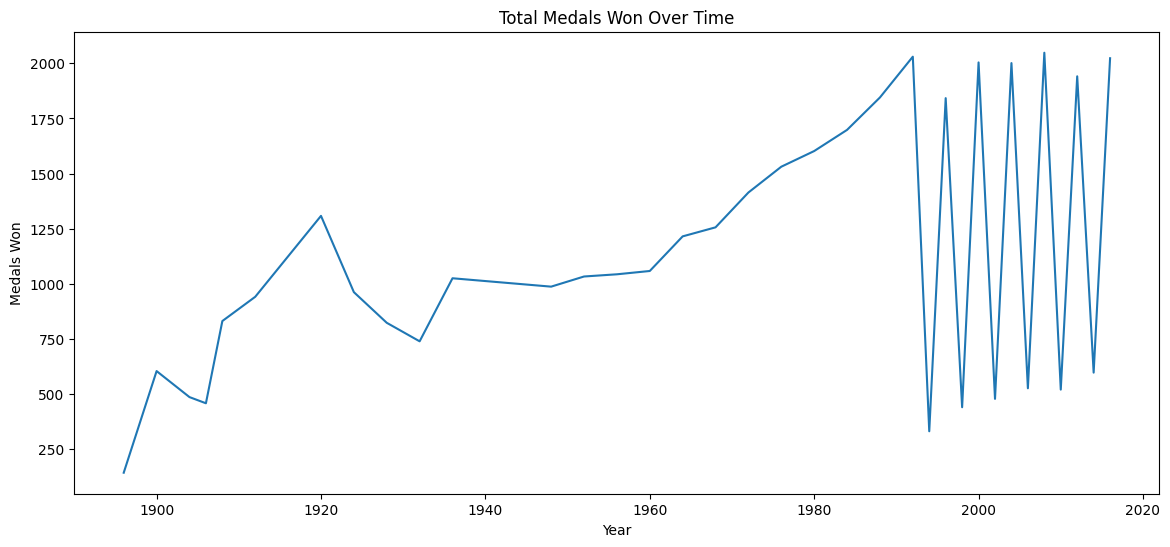

In [8]:
# Medals over years
year_medals = df[df["Medal"]!="No Medal"].groupby("Year")["MedalWon"].sum().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(x="Year", y="MedalWon", data=year_medals)
plt.title("Total Medals Won Over Time")
plt.xlabel("Year")
plt.ylabel("Medals Won")
plt.show()

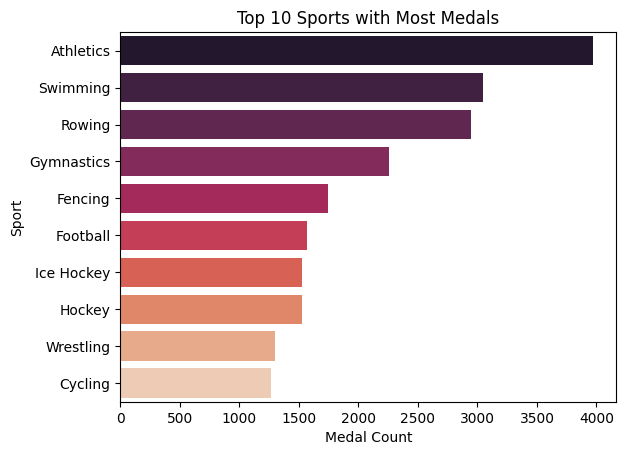

In [9]:
# Count medals by sport
sport_medals = df[df["Medal"]!="No Medal"].groupby("Sport")["Medal"].count().reset_index()
sport_medals = sport_medals.sort_values(by="Medal", ascending=False).head(10)

sns.barplot(x="Medal", y="Sport", data=sport_medals, palette="rocket")
plt.title("Top 10 Sports with Most Medals")
plt.xlabel("Medal Count")
plt.ylabel("Sport")
plt.show()

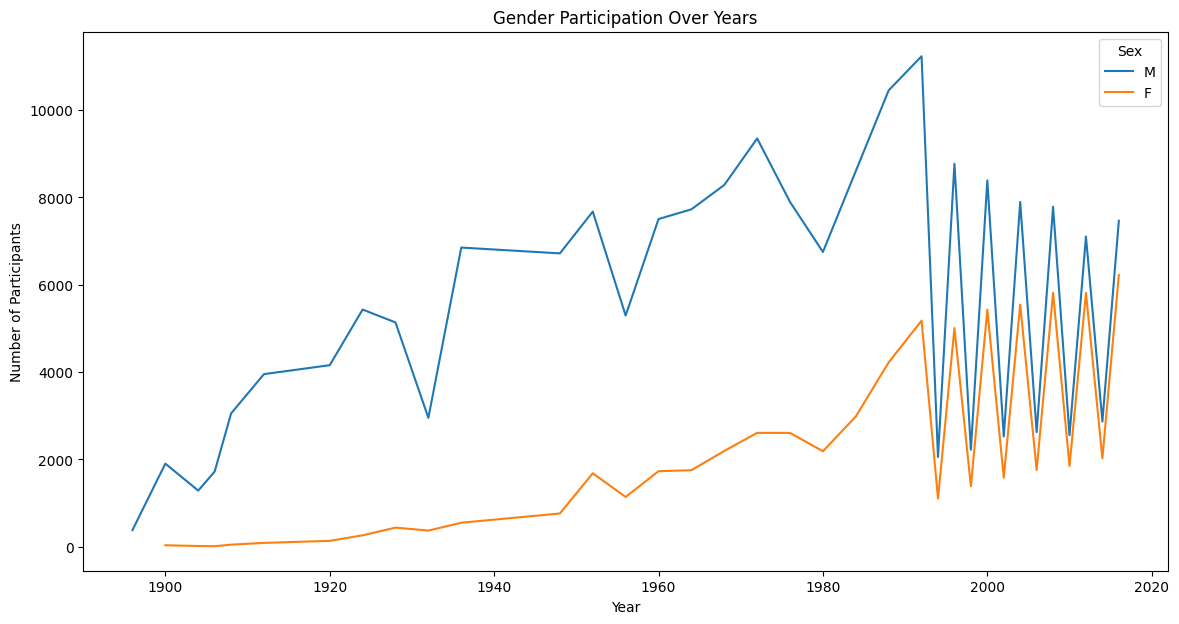

In [10]:
gender_year = df.groupby(["Year","Sex"])["ID"].count().reset_index()

plt.figure(figsize=(14,7))
sns.lineplot(x="Year", y="ID", hue="Sex", data=gender_year)
plt.title("Gender Participation Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Participants")
plt.show()

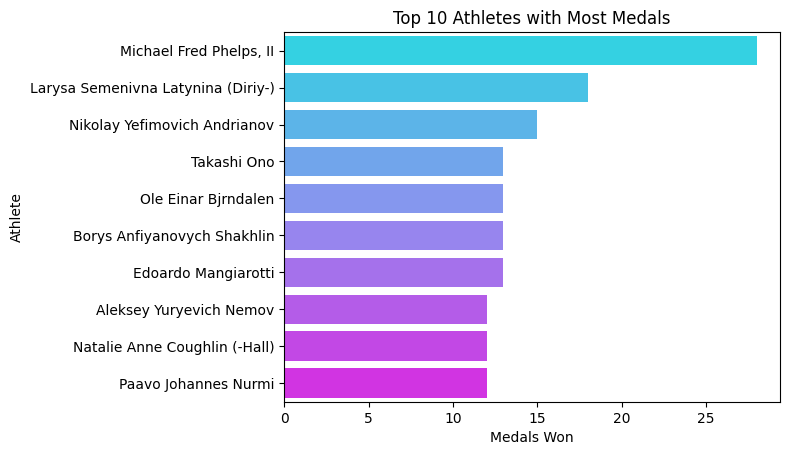

In [11]:
top_athletes = df[df["Medal"]!="No Medal"].groupby(["Name","Sport"])["Medal"].count().reset_index()
top_athletes = top_athletes.sort_values(by="Medal", ascending=False).head(10)

sns.barplot(x="Medal", y="Name", data=top_athletes, palette="cool")
plt.title("Top 10 Athletes with Most Medals")
plt.xlabel("Medals Won")
plt.ylabel("Athlete")
plt.show()

In [12]:
# Prepare dataset
ml_df = df[df["Medal"]!="No Medal"].groupby(["Year","region"])["MedalWon"].sum().reset_index()

# Encode region to number
ml_df["region_encoded"] = ml_df["region"].astype("category").cat.codes

X = ml_df[["Year","region_encoded"]]
y = ml_df["MedalWon"]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
preds = model.predict(X_test)

print("R2 Score:", r2_score(y_test,preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test,preds)))

R2 Score: 0.336500806485309
RMSE: 46.61923376293691
